In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/amesh-jayaweera/ann/main/bank-additional-full.csv',sep=';') 
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop('duration', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np

df_cont = df.select_dtypes(include = np.number)
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [ ]:
min_p = df_cont.quantile(0.05)
max_p = df_cont.quantile(0.95)

# Column vs Number of Outliers
((df_cont <= min_p) | (df_cont >= max_p)).sum()

age                4596
campaign          20048
pdays             41188
previous          41188
emp.var.rate      19140
cons.price.idx     6897
cons.conf.idx      5263
euribor3m          4530
nr.employed       19363
dtype: int64

Before Shape: (41188, 9)
After Shape: (41187, 9)


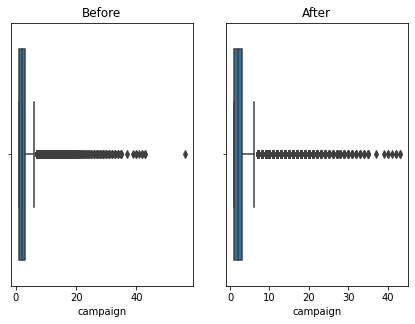

In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",df_cont.shape)

# Removing all the outliers
df2 = df_cont[(df_cont['campaign'] < 50)]

#Visulization
print("After Shape:",df2.shape)

sns.boxplot(df['campaign'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['campaign'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

df_cont = df2

In [ ]:
df_label = df.select_dtypes(include = np.object)
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [ ]:
# get y col
df_label_y = pd.DataFrame(df_label['y'],columns = ['y'])

# get contact col
df_label_contact = pd.DataFrame(df_label['contact'],columns = ['contact'])

# apply cat coding for y col
df_label_y['y'] = df_label_y['y'].astype('category')
df_label_y['y'] = df_label_y['y'].cat.codes

# apply cat coding for contact col
df_label_contact['contact'] = df_label_contact['contact'].astype('category')
df_label_contact['contact'] = df_label_contact['contact'].cat.codes

df_label_encoded = pd.concat([df_label_y, df_label_contact], axis=1, join="inner")
df_label_encoded.head(3)

,y,contact
0,0,1
1,0,1
2,0,1


In [ ]:
# import one-hot encoder library
from sklearn.preprocessing import OneHotEncoder

# init encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# columns need to be encoded using one-hot encoder
columns = ['job','marital','education','default','housing','loan','month','day_of_week','poutcome']

# fit the model
one_hot_encoder.fit(df_label[columns])
col_names = one_hot_encoder.get_feature_names()

# tranform to numerical using one hot encoder
df_onehot_encoded = pd.DataFrame(one_hot_encoder.transform(df_label[columns]).toarray(),columns = col_names)

# concat all label columns into one dataframe
df_encoded_conact = pd.concat([df_label_encoded,df_onehot_encoded], axis=1, join="inner")
df_encoded_conact.head(5)

,y,contact,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,...,x6_oct,x6_sep,x7_fri,x7_mon,x7_thu,x7_tue,x7_wed,x8_failure,x8_nonexistent,x8_success
0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# concat all categoriacal and continous columns into one dataframe
df_new = pd.concat([df_cont,df_encoded_conact], axis=1, join="inner")
df_new.head(5)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,x6_oct,x6_sep,x7_fri,x7_mon,x7_thu,x7_tue,x7_wed,x8_failure,x8_nonexistent,x8_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
dataset = df_new.drop('y', 1)
dataset['y'] = df_new['y']
dataset = dataset.reset_index(drop=True)
from sklearn.preprocessing import StandardScaler
# Removing Categorical Features before the feature scaling
columns = dataset.columns
# Continous col
columns_cont = np.delete(columns,np.s_[9:])
# Categorical col
columns_categorical = np.delete(columns,np.s_[0:9])

# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler() 

#Transformation of training dataset features
dataset_except = pd.DataFrame(dataset, columns = columns_cont)
scaler.fit(dataset_except)
dataset = pd.DataFrame(scaler.transform(dataset_except), columns = columns_cont).join(dataset[columns_categorical])

dataset = dataset.drop('emp.var.rate', 1)
dataset = dataset.drop('cons.price.idx', 1)
dataset = dataset.drop('euribor3m', 1)

from sklearn.decomposition import PCA

# see explained variance ratios
pca = PCA()
pca.fit(dataset)
#pca.explained_variance_ratio_

dataset

,age,campaign,pdays,previous,cons.conf.idx,nr.employed,contact,x0_admin.,x0_blue-collar,x0_entrepreneur,...,x6_sep,x7_fri,x7_mon,x7_thu,x7_tue,x7_wed,x8_failure,x8_nonexistent,x8_success,y
0,1.533008,-0.568018,0.195416,-0.349499,0.886466,0.331684,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.628966,-0.568018,0.195416,-0.349499,0.886466,0.331684,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-0.290203,-0.568018,0.195416,-0.349499,0.886466,0.331684,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.002327,-0.568018,0.195416,-0.349499,0.886466,0.331684,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1.533008,-0.568018,0.195416,-0.349499,0.886466,0.331684,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,3.164302,-0.568018,0.195416,-0.349499,-2.224926,-2.815658,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
41183,0.573423,-0.568018,0.195416,-0.349499,-2.224926,-2.815658,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
41184,1.533008,-0.205367,0.195416,-0.349499,-2.224926,-2.815658,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
41185,0.381506,-0.568018,0.195416,-0.349499,-2.224926,-2.815658,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
dataset.columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'nr.employed',
       'contact', 'x0_admin.', 'x0_blue-collar', 'x0_entrepreneur',
       'x0_housemaid', 'x0_management', 'x0_retired', 'x0_self-employed',
       'x0_services', 'x0_student', 'x0_technician', 'x0_unemployed',
       'x0_unknown', 'x1_divorced', 'x1_married', 'x1_single', 'x1_unknown',
       'x2_basic.4y', 'x2_basic.6y', 'x2_basic.9y', 'x2_high.school',
       'x2_illiterate', 'x2_professional.course', 'x2_university.degree',
       'x2_unknown', 'x3_no', 'x3_unknown', 'x3_yes', 'x4_no', 'x4_unknown',
       'x4_yes', 'x5_no', 'x5_unknown', 'x5_yes', 'x6_apr', 'x6_aug', 'x6_dec',
       'x6_jul', 'x6_jun', 'x6_mar', 'x6_may', 'x6_nov', 'x6_oct', 'x6_sep',
       'x7_fri', 'x7_mon', 'x7_thu', 'x7_tue', 'x7_wed', 'x8_failure',
       'x8_nonexistent', 'x8_success', 'y'],
      dtype='object')

In [ ]:
dataset.shape[1]

59

In [ ]:
array = []
lst = []
for i in range(0,dataset.shape[0]):
  lst=[]
  for j in range(0,dataset.shape[1]):
    lst.append(0)
  array.append(lst)
#for i in range(0,dataset.shape[0]):
 # for j in range(0,dataset.shape[1]):
  #  print(array[i][j]," ")
 # print('\n')
len(array[0])

59

In [ ]:
columns = ['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'nr.employed',
       'contact', 'x0_admin.', 'x0_blue-collar', 'x0_entrepreneur',
       'x0_housemaid', 'x0_management', 'x0_retired', 'x0_self-employed',
       'x0_services', 'x0_student', 'x0_technician', 'x0_unemployed',
       'x0_unknown', 'x1_divorced', 'x1_married', 'x1_single', 'x1_unknown',
       'x2_basic.4y', 'x2_basic.6y', 'x2_basic.9y', 'x2_high.school',
       'x2_illiterate', 'x2_professional.course', 'x2_university.degree',
       'x2_unknown', 'x3_no', 'x3_unknown', 'x3_yes', 'x4_no', 'x4_unknown',
       'x4_yes', 'x5_no', 'x5_unknown', 'x5_yes', 'x6_apr', 'x6_aug', 'x6_dec',
       'x6_jul', 'x6_jun', 'x6_mar', 'x6_may', 'x6_nov', 'x6_oct', 'x6_sep',
       'x7_fri', 'x7_mon', 'x7_thu', 'x7_tue', 'x7_wed', 'x8_failure',
       'x8_nonexistent', 'x8_success', 'y']
for i in range(0,dataset.shape[0]):
  for j in range(0,dataset.shape[1]):
    array[i][j] = dataset[columns[j]][i]

In [ ]:
len(array[0])

59

In [ ]:
import random
from math import exp
from random import seed

# Initialize a network

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    i= 1
    print("\n The initialised Neural Network:\n")
    for layer in network:
        j=1
        for sub in layer:
            print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
            j=j+1
        i=i+1
    return network

# Calculate neuron activation (net) for an input

def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += float(weights[i]) * float(inputs[i])
    return activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 

# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
 

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
   
    print("\n Network Training Begins:\n")
    
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    print("\n Network Training Ends:\n")
 

#Test training backprop algorithm
seed(2) 
print("\n The input Data Set :\n",dataset)
n_inputs = dataset.shape[1]
print("\n Number of Inputs :\n",n_inputs)
n_outputs = 2
print("\n Number of Outputs :\n",n_outputs)

#Network Initialization
network = initialize_network(n_inputs, 2, n_outputs)

# Training the Network
train_network(network,array, 0.1, 50, n_outputs)


print("\n Final Neural Network :")
    
i= 1
for layer in network:
    j=1
    for sub in layer:
        print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
        j=j+1
    i=i+1



 The input Data Set :
             age  campaign     pdays  previous  cons.conf.idx  nr.employed  \
0      1.533008 -0.568018  0.195416 -0.349499       0.886466     0.331684   
1      1.628966 -0.568018  0.195416 -0.349499       0.886466     0.331684   
2     -0.290203 -0.568018  0.195416 -0.349499       0.886466     0.331684   
3     -0.002327 -0.568018  0.195416 -0.349499       0.886466     0.331684   
4      1.533008 -0.568018  0.195416 -0.349499       0.886466     0.331684   
...         ...       ...       ...       ...            ...          ...   
41182  3.164302 -0.568018  0.195416 -0.349499      -2.224926    -2.815658   
41183  0.573423 -0.568018  0.195416 -0.349499      -2.224926    -2.815658   
41184  1.533008 -0.205367  0.195416 -0.349499      -2.224926    -2.815658   
41185  0.381506 -0.568018  0.195416 -0.349499      -2.224926    -2.815658   
41186  3.260260  0.157283  0.195416  1.671110      -2.224926    -2.815658   

       contact  x0_admin.  x0_blue-collar  x0_entre

In [ ]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))


for row in array:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Streaming output truncated to the last 5000 lines.
Expected=0, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=1, G

In [ ]:

X = df_new.drop('y', 1)
y = pd.DataFrame(df_new['y'], columns=["y"])

from sklearn.model_selection import train_test_split

# spliting dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

# reset indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# get copy of X_train and X_test before standardization
X_copy_before_standardization = pd.concat([X_train,X_test])

X_train.head(5)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,...,x6_oct,x6_sep,x7_fri,x7_mon,x7_thu,x7_tue,x7_wed,x8_failure,x8_nonexistent,x8_success
0,52,2,999,0,-2.9,92.963,-40.8,1.260,5076.2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,42,1,999,0,1.4,94.465,-41.8,4.958,5228.1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,51,3,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,58,2,999,0,1.4,93.444,-36.1,4.964,5228.1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,36,4,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Removing Categorical Features before the feature scaling
columns = X_train.columns
# Continous col
columns_cont = np.delete(columns,np.s_[9:])
# Categorical col
columns_categorical = np.delete(columns,np.s_[0:9])

# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler() 

#Transformation of training dataset features
X_train_except = pd.DataFrame(X_train, columns = columns_cont)
scaler.fit(X_train_except)
X_train = pd.DataFrame(scaler.transform(X_train_except), columns = columns_cont).join(X_train[columns_categorical])

#Transformation of testing dataset features
X_test_except = pd.DataFrame(X_test, columns = columns_cont)
scaler.fit(X_test_except)
X_test = pd.DataFrame(scaler.transform(X_test_except), columns = columns_cont).join(X_test[columns_categorical])

# get copy of X_train and X_test after standardization
X_copy_after_standardization = pd.concat([X_train,X_test])

X_train.head(2)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,...,x6_oct,x6_sep,x7_fri,x7_mon,x7_thu,x7_tue,x7_wed,x8_failure,x8_nonexistent,x8_success
0,1.149331,-0.204388,0.194243,-0.348864,-1.888179,-1.051826,-0.057582,-1.352657,-1.251430,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.190238,-0.565985,0.194243,-0.348864,0.844287,1.536655,-0.273491,0.775821,0.849383,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train = X_train.drop('emp.var.rate', 1)
X_train = X_train.drop('cons.price.idx', 1)
X_train = X_train.drop('euribor3m', 1)

X_test = X_test.drop('emp.var.rate', 1)
X_test = X_test.drop('cons.price.idx', 1)
X_test = X_test.drop('euribor3m', 1)

In [ ]:
from sklearn.decomposition import PCA

# see explained variance ratios
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components = 27)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

# see explained variance ratios
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.88508032e-01, 1.10032530e-01, 8.72358233e-02, 8.60908888e-02,
       5.61906515e-02, 4.35805138e-02, 4.01621936e-02, 3.92028154e-02,
       2.78585746e-02, 2.49715749e-02, 2.43266006e-02, 2.30111685e-02,
       2.19083944e-02, 1.93119376e-02, 1.82431531e-02, 1.76367550e-02,
       1.71441695e-02, 1.68559251e-02, 1.56438563e-02, 1.23734098e-02,
       1.15905319e-02, 1.14783580e-02, 1.02156330e-02, 8.89150235e-03,
       7.12733046e-03, 6.46447706e-03, 5.92447791e-03, 5.71135444e-03,
       5.30650541e-03, 4.72235353e-03, 4.11190815e-03, 3.91004241e-03,
       3.72397132e-03, 3.03624116e-03, 2.97886488e-03, 2.78479469e-03,
       2.35549364e-03, 2.14900280e-03, 1.65797283e-03, 1.47264813e-03,
       1.22000368e-03, 1.06207938e-03, 7.49050137e-04, 4.28538368e-04,
       3.54914300e-04, 2.31627287e-04, 3.94129104e-05, 1.19429126e-05,
       3.71766541e-32, 1.38239541e-33, 1.26119006e-33, 1.17988724e-33,
       1.15548945e-33, 1.14541999e-33, 8.74537133e-34, 8.74537133e-34,
      

In [ ]:

pca = PCA(n_components = 27)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
#import tensorflow libraries 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# determine the number of input features
n_features = X_train_pca.shape[1]
n_features 

27

In [ ]:
n_epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / n_epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [ ]:
# compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train_pca, y_train, epochs=n_epochs, batch_size=32, verbose=0)

In [ ]:
loss, acc = model.evaluate(X_test_pca, y_test, verbose=0)
print('Test Accuracy: %.3f ' % (acc * 100.0))

Test Accuracy: 90.289 


<Figure size 576x576 with 0 Axes>

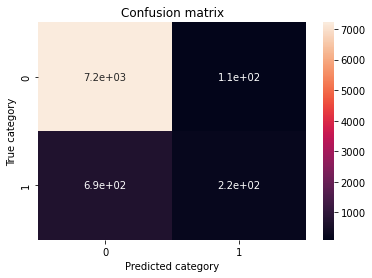

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test_pca)

# custom classifier 
predictions = model.predict(X_test_pca)
data = []
for x in predictions:
    # if the weight > 0.5, then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

# init confusion matrix 
cnf_matrix = confusion_matrix(y_test, data)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True)
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()  

In [ ]:
print('MLP (NN) : \n', classification_report(y_test, data),'\n')

MLP (NN) : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7324
           1       0.67      0.24      0.36       914

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238
 

